In [302]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#データの標準化のためのライブラリ
from sklearn.preprocessing import StandardScaler

# 線形回帰のためのライブラリ
from sklearn.linear_model import LinearRegression as LR

# スコア計算のためのライブラリ
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

plt.style.use('ggplot')
%matplotlib inline

In [304]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# データの確認

train_data['datetime'] = pd.to_datetime(train_data['datetime'])
test_data['datetime'] = pd.to_datetime(test_data['datetime'])

train_data = train_data.rename(columns = {'datetime' : 'ds'}) 
test_data = test_data.rename(columns = {'datetime' : 'ds'}) 

print(f'データ数：{len(train_data)}')
print(train_data.head())
print('データ型:')
print(train_data.dtypes)
print('===========================================================')
print(f'データ数：{len(test_data)}')
print(test_data.head())

データ数：2101
          ds   y  client  close  price_am  price_pm
0 2010-07-01  17       0      0        -1        -1
1 2010-07-02  18       0      0        -1        -1
2 2010-07-03  20       0      0        -1        -1
3 2010-07-04  20       0      0        -1        -1
4 2010-07-05  14       0      0        -1        -1
データ型:
ds          datetime64[ns]
y                    int64
client               int64
close                int64
price_am             int64
price_pm             int64
dtype: object
データ数：365
          ds  client  close  price_am  price_pm
0 2016-04-01       1      0         3         2
1 2016-04-02       0      0         5         5
2 2016-04-03       1      0         2         2
3 2016-04-04       1      0         1         1
4 2016-04-05       0      0         1         1


<Axes: >

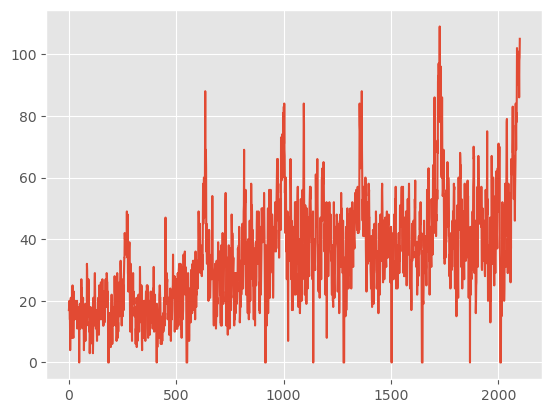

In [306]:
train_data['y'].plot()

In [309]:
# datetime64をint64（タイムスタンプ）に変換
train_data['ds'] = train_data['ds'].astype('int64')
test_data['ds'] = test_data['ds'].astype('int64')


In [312]:
x = train_data[['ds', 'client', 'close', 'price_am', 'price_pm']]
y = train_data[['y']]

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [316]:
# モデルにデータを学習させる
model = RFR(random_state=0)
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [318]:
score = model.score(x_test, y_test)

In [320]:
score

0.7640354121249439

In [322]:
predictions = model.predict(test_data)

In [324]:
predictions

array([ 94.18, 100.48,  90.54,  78.24,  79.66,  78.24,  78.24,  79.66,
        90.54,  78.24,  57.53,  57.53,  57.53,  57.53,  61.2 ,  86.53,
        79.66,  51.81,  51.81,  51.81,  51.81,  79.66,  90.98,  86.53,
        79.66,  51.81,  61.22,  79.66,  93.12,  93.12,  86.8 ,  57.53,
        61.22,  79.66,  51.81,  51.81,  78.24,  68.7 ,  51.81,  51.81,
        51.81,  51.81,  79.66,  78.24,  61.2 ,  51.81,  51.81,  51.81,
        51.81,  79.66,  86.8 ,  79.66,  51.81,  51.81,  51.81,  51.81,
        79.66,  90.98,  86.8 ,  79.66,  79.66,  78.24,  51.81,  61.2 ,
        86.53,  61.22,  51.81,  51.81,  51.81,  51.81,  61.22,  79.66,
        61.22,  51.81,  51.81,  51.81,  51.81,  79.66,  79.66,  61.22,
        51.81,  51.81,  51.81,  51.81,  79.66,  90.98,  86.8 ,  61.22,
        61.2 ,  61.22,  79.66,  79.66,  86.8 ,  79.66,  51.81,  51.81,
        51.81,  51.81,  79.66,  90.98,  51.81,  51.81,  51.81,  51.81,
        51.81,  79.66,  79.66,  61.2 ,  51.81,  51.81,  51.81,  51.81,
      

In [260]:
test_data['ds'] = pd.to_datetime(test_data['ds'])

submit = pd.DataFrame({
    'Date': test_data['ds'],
    'Prediction': predictions
})
submit.columns = submit.iloc[0]
submit

,2016-04-01 00:00:00,93.29
0,2016-04-01,93.29
1,2016-04-02,100.99
2,2016-04-03,86.39
3,2016-04-04,80.30
4,2016-04-05,81.40
...,...,...
360,2017-03-27,102.38
361,2017-03-28,101.63
362,2017-03-29,100.53
363,2017-03-30,100.52


In [266]:
submit.to_csv('submit_RF.csv', index=False)